In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Analyzing the Customer Dataset 

In [3]:
customer_data=pd.read_excel('customers.xlsx')
items_data=pd.read_excel('items.xlsx')

In [4]:
customer_data.head()

,No.,Name,Responsibility Center,Location Code,Phone No.,Email,Profit Center,Contact,Balance (LCY),Balance Due (LCY),Sales (LCY),Payments (LCY)
0,C0000000005,CHANDARANA SUPERMAKET LTD- HQ,NaN,RC,NaN,NaN,NB,NaN,9380389.38,948623.38,2.843362e+08,3.213748e+08
1,C0000000010,CRYSTAL FROZEN & CHILLED FOODS LTD- HIGHRIDGE,NaN,RC,NaN,mungai@crystalfrozen.com,NB,D\LAND,0.00,0.00,9.100003e+05,1.797384e+06
2,C0000000015,CRYSTAL FROZEN & CHILLED FOODS LTD,NaN,RC,NaN,mungai@crystalfrozen.com,NB,NaN,0.00,0.00,2.277598e+07,3.192183e+07
3,C0000000020,CRYSTAL FROZEN & CHILLED FOODS LTD,NaN,RC,NaN,mungai@crystalfrozen.com,NB,NaN,0.00,0.00,4.721999e+05,5.922241e+05
4,C0000000025,DORMANS COFFEE LTD,NaN,RC,NaN,NaN,NB,NaN,0.00,0.00,0.000000e+00,0.000000e+00


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8662 entries, 0 to 8661
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No.                    8662 non-null   object 
 1   Name                   5842 non-null   object 
 2   Responsibility Center  0 non-null      float64
 3   Location Code          5832 non-null   object 
 4   Phone No.              3346 non-null   object 
 5   Email                  2746 non-null   object 
 6   Profit Center          5371 non-null   object 
 7   Contact                3119 non-null   object 
 8   Balance (LCY)          8662 non-null   float64
 9   Balance Due (LCY)      8662 non-null   float64
 10  Sales (LCY)            8662 non-null   float64
 11  Payments (LCY)         8662 non-null   float64
dtypes: float64(5), object(7)
memory usage: 812.2+ KB


In [6]:
print(customer_data.shape)

(8662, 12)


1. Cleaning the data

In [7]:
customer_data.isna().sum()

No.                         0
Name                     2820
Responsibility Center    8662
Location Code            2830
Phone No.                5316
Email                    5916
Profit Center            3291
Contact                  5543
Balance (LCY)               0
Balance Due (LCY)           0
Sales (LCY)                 0
Payments (LCY)              0
dtype: int64

In [8]:
# Calculating the percentage missing value for each column 

In [9]:
missing_values= (customer_data.isnull().sum()/ len(customer_data))*100

In [10]:
missing_values

No.                        0.000000
Name                      32.555992
Responsibility Center    100.000000
Location Code             32.671438
Phone No.                 61.371508
Email                     68.298314
Profit Center             37.993535
Contact                   63.992150
Balance (LCY)              0.000000
Balance Due (LCY)          0.000000
Sales (LCY)                0.000000
Payments (LCY)             0.000000
dtype: float64

In [11]:
# remove columns with more than 50% missing values for instnace the responibility centre with a mask > 50%

In [12]:
mask = missing_values > 50.0

In [13]:
customer_data_clean=customer_data.loc[:,~mask]

In [14]:
customer_data_clean.isna().sum()

No.                     0
Name                 2820
Location Code        2830
Profit Center        3291
Balance (LCY)           0
Balance Due (LCY)       0
Sales (LCY)             0
Payments (LCY)          0
dtype: int64

In [15]:
customer_data_clean.head()

,No.,Name,Location Code,Profit Center,Balance (LCY),Balance Due (LCY),Sales (LCY),Payments (LCY)
0,C0000000005,CHANDARANA SUPERMAKET LTD- HQ,RC,NB,9380389.38,948623.38,2.843362e+08,3.213748e+08
1,C0000000010,CRYSTAL FROZEN & CHILLED FOODS LTD- HIGHRIDGE,RC,NB,0.00,0.00,9.100003e+05,1.797384e+06
2,C0000000015,CRYSTAL FROZEN & CHILLED FOODS LTD,RC,NB,0.00,0.00,2.277598e+07,3.192183e+07
3,C0000000020,CRYSTAL FROZEN & CHILLED FOODS LTD,RC,NB,0.00,0.00,4.721999e+05,5.922241e+05
4,C0000000025,DORMANS COFFEE LTD,RC,NB,0.00,0.00,0.000000e+00,0.000000e+00


In [16]:
customer_clean=customer_data_clean.dropna()

In [17]:
print(customer_clean.shape)

(5367, 8)


2. Exploratory data analysis 

In [18]:
# checking the number of unique values for each categorical variable 

In [19]:
cat_columns = customer_clean.select_dtypes(include=['object']).columns


In [20]:
print(cat_columns)

Index(['No.', 'Name', 'Location Code', 'Profit Center'], dtype='object')


In [21]:
nunique = customer_clean[cat_columns].nunique()
print(nunique)

No.              5367
Name             5206
Location Code       6
Profit Center      12
dtype: int64


In [22]:
print(customer_clean.columns)

Index(['No.', 'Name', 'Location Code', 'Profit Center', 'Balance (LCY)',
       'Balance Due (LCY)', 'Sales (LCY)', 'Payments (LCY)'],
      dtype='object')


In [23]:
# creating new columns based on the relationships , for instance;balance outstanding = balance - balance due 

In [24]:
customer_clean = customer_clean.copy()


In [25]:
customer_clean['outstanding_balance']= customer_clean['Balance (LCY)']- customer_clean['Balance Due (LCY)']

In [26]:
# additionally , it was important to get to know the proportion of sales that have been paid for by the customers by taking the payments made divided by the total sales. 

In [27]:
# since we are dividing sales by payments it is important to remove all sales values of 0 as the resultant value will be an infinite 
non_zerosales = customer_clean[customer_clean['Sales (LCY)'] != 0]
non_zerosales = non_zerosales.copy()
non_zerosales['payment_sale_ratio']=non_zerosales['Payments (LCY)']/non_zerosales['Sales (LCY)']

3. Visualizations 

In [28]:
# top 10 customers with the highest balance outstanding 

In [29]:
highest_balance_outstanding = customer_clean.sort_values('outstanding_balance', ascending=False)


In [30]:
customers_highest_outstanding= highest_balance_outstanding.head(10)

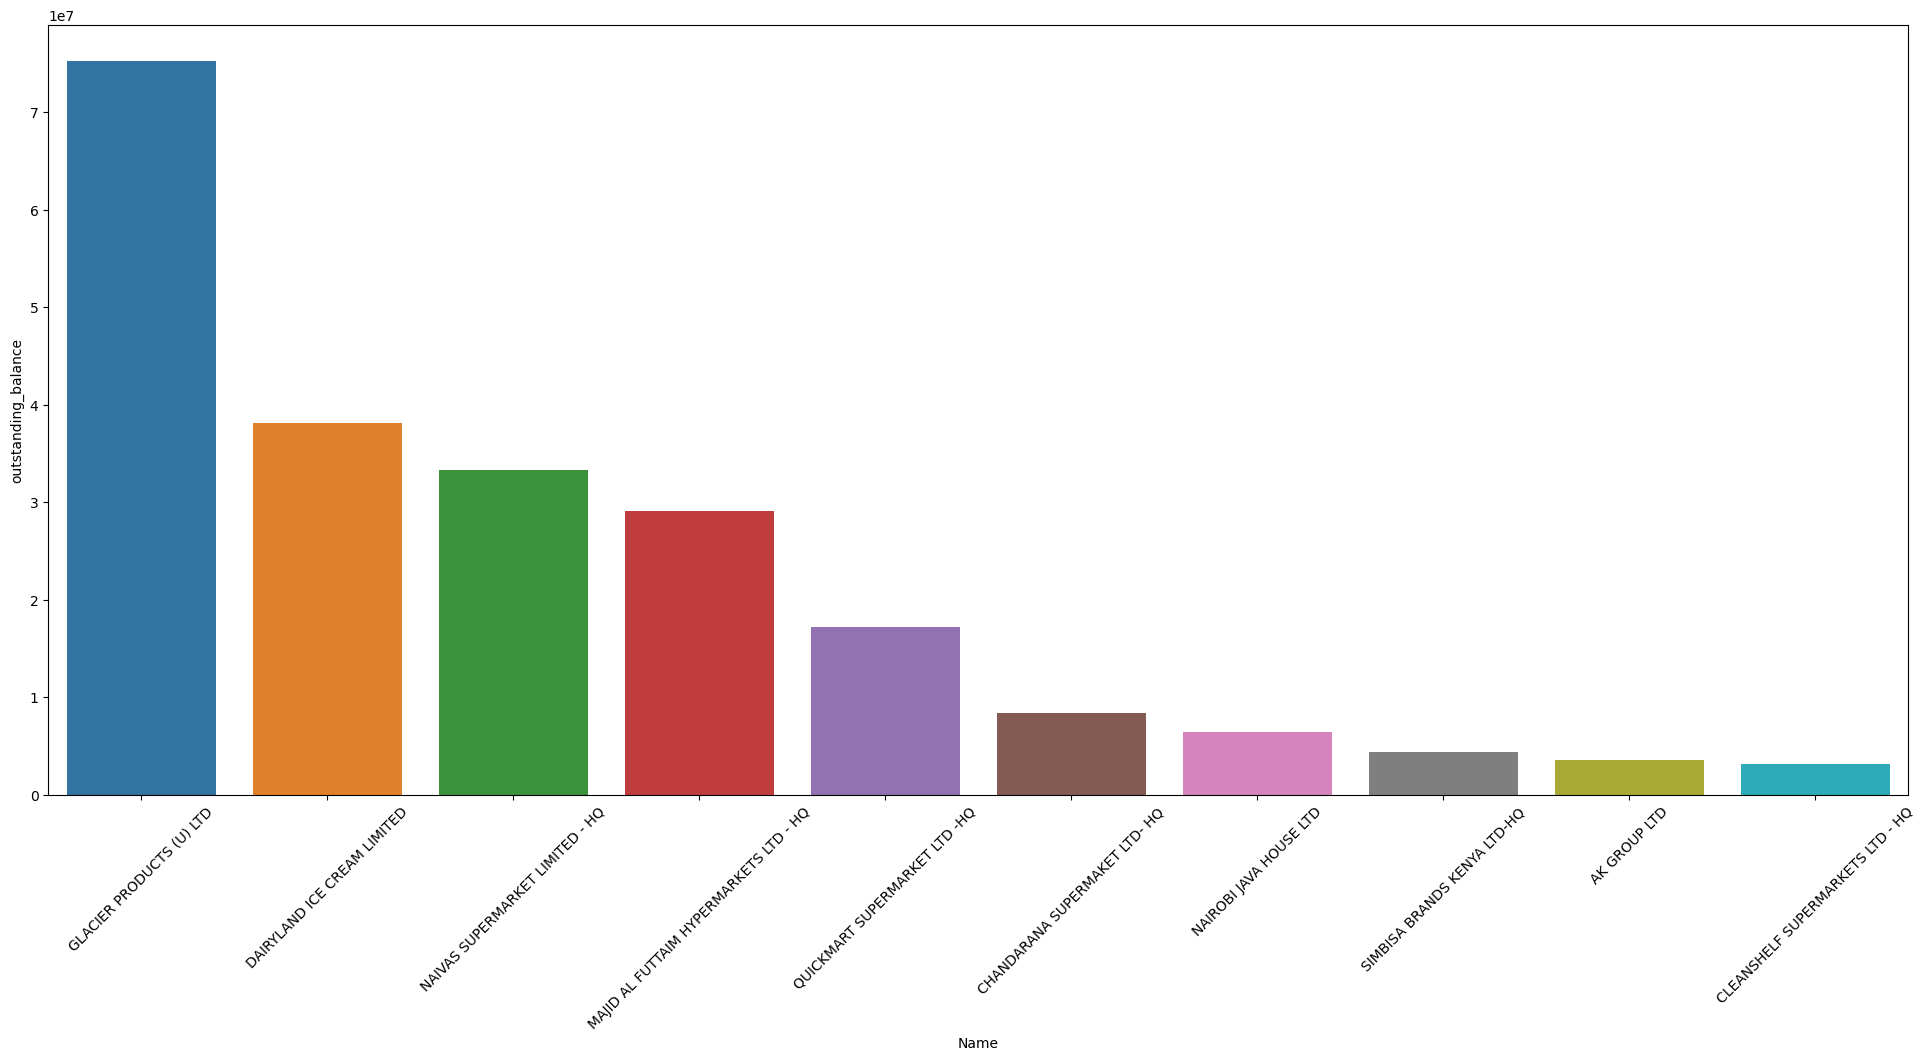

In [31]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.barplot(x='Name',y='outstanding_balance',data=customers_highest_outstanding)
plt.xticks(rotation=45)
plt.show()

In [32]:
# top ten customers with the lowest balance outstanding 

In [33]:
lowest_balance_outstanding = customer_clean.sort_values('outstanding_balance', ascending=True)


In [34]:
low_balance=lowest_balance_outstanding.head(10)

In [35]:
low_balance.head(10)

,No.,Name,Location Code,Profit Center,Balance (LCY),Balance Due (LCY),Sales (LCY),Payments (LCY),outstanding_balance
2685,C0000013465,MWAL-MART,NKR,NB,0.0,0.0,27505.17,0.00,0.0
3571,C0000017985,QUEEN COFFEE AND CREAMERY,RC,NB,0.0,0.0,747483.63,873024.00,0.0
3570,C0000017980,GODE SHOP - MOYALE,RC,UC,46235.0,46235.0,350302.13,359482.00,0.0
3569,C0000017975,MEGAMATT SUPERMARKET LTD,RC,NB,0.0,0.0,264024.33,306157.00,0.0
3568,C0000017970,GEM'S JUICE BAR,RC,NB,14086.0,14086.0,854546.34,985290.01,0.0
3567,C0000017965,BARMAH SHOP - KITUI,RC,UC,0.0,0.0,0.00,0.00,0.0
3566,C0000017960,KAHWA SELFRIDGES STORES LTD-RUARAKA,RC,NB,67030.0,67030.0,1466222.98,1640267.99,0.0
3565,C0000017955,FORTHALL HOTEL LTD- THIKAMART S/MARKET,RC,NB,0.0,0.0,69766.73,91820.00,0.0
3572,C0000017990,IGAR RESTAURANT - BEIRUT,RC,NB,0.0,0.0,134482.76,156000.00,0.0
3564,C0000017950,TEA AND CAKE POP UP,MO,MO,38475.0,38475.0,6319733.45,7398938.00,0.0


In [36]:
# top ten customers with the highest payment to sales ratio

In [37]:
highest_ratio=non_zerosales.sort_values('payment_sale_ratio',ascending=False)

In [38]:
top_ratios=highest_ratio.head(10)

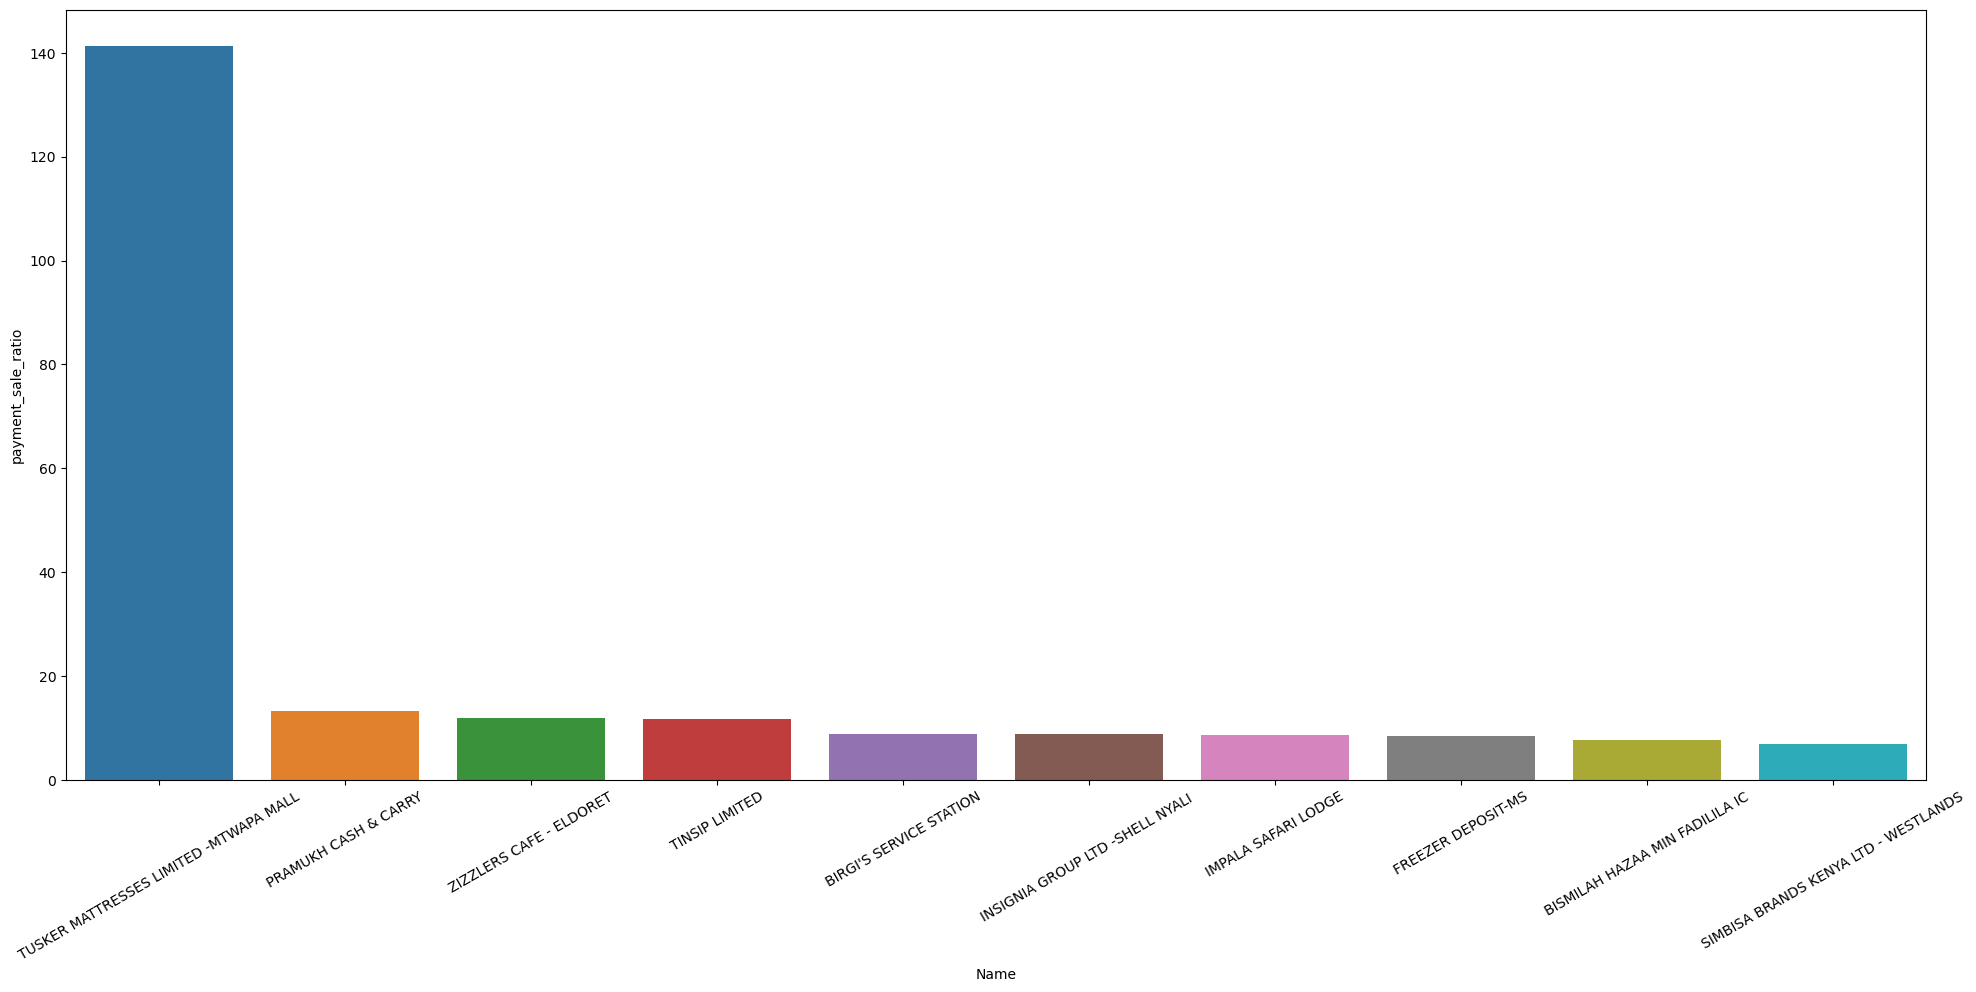

In [39]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.barplot(x='Name',y='payment_sale_ratio',data=top_ratios)
plt.xticks(rotation=30)
plt.show()

In [40]:
# Companies with the lowest payment to sale ratio

In [41]:
low_ratio=non_zerosales.sort_values('payment_sale_ratio',ascending = True)
low_ratio.head(10)

,No.,Name,Location Code,Profit Center,Balance (LCY),Balance Due (LCY),Sales (LCY),Payments (LCY),outstanding_balance,payment_sale_ratio
1185,C0000005930,NGALA CLASSIC BUTCHERY 2,MO,MO,0.0,0.0,-284.02,2250.00,0.0,-7.921977
471,C0000002360,QWAYS SUPERMARKET,RC,NB,0.0,0.0,-7252.52,21486.99,0.0,-2.962693
973,C0000004870,KAREEN MINI MARKET,MO,MO,0.0,0.0,-11257.82,4941.01,0.0,-0.438896
1963,C0000009845,BULLMART SUPER MARKET LTD,NKR,NB,0.0,0.0,16075.86,0.00,0.0,0.000000
1959,C0000009825,EESHA'S TAKEAWAY SHOP,NKR,NB,0.0,0.0,26168.96,0.00,0.0,0.000000
533,C0000002670,URBAN SPOON RESTAURANT,RC,NB,0.0,0.0,7837.59,0.00,0.0,0.000000
4707,C0000023670,SPRINGSTAR SUPERMARKET LIMITED - TRM DRIVE,RC,NB,-3200.0,-3200.0,-2758.62,0.00,0.0,-0.000000
3086,C0000015485,MOMRES TRADING CO. LTD,NKR,NB,0.0,0.0,18741.38,0.00,0.0,0.000000
5774,C0000029025,RASHFUNDI SUPERMARKET,NKR,HO,92054.0,92054.0,79356.90,0.00,0.0,0.000000
1245,C0000006230,SULMAT SPMRKT,RC,NB,0.0,0.0,14578.14,0.00,0.0,0.000000


In [42]:
# Locations with the highest Sales 

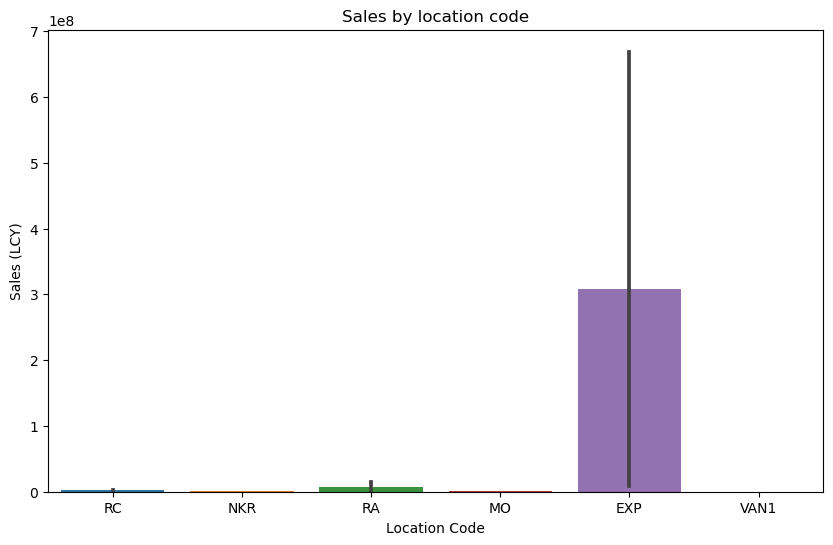

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Location Code',y='Sales (LCY)',data=customer_clean)
ax.set_title('Sales by location code')
plt.show()

In [44]:
# Profit Centers with the highest sales 

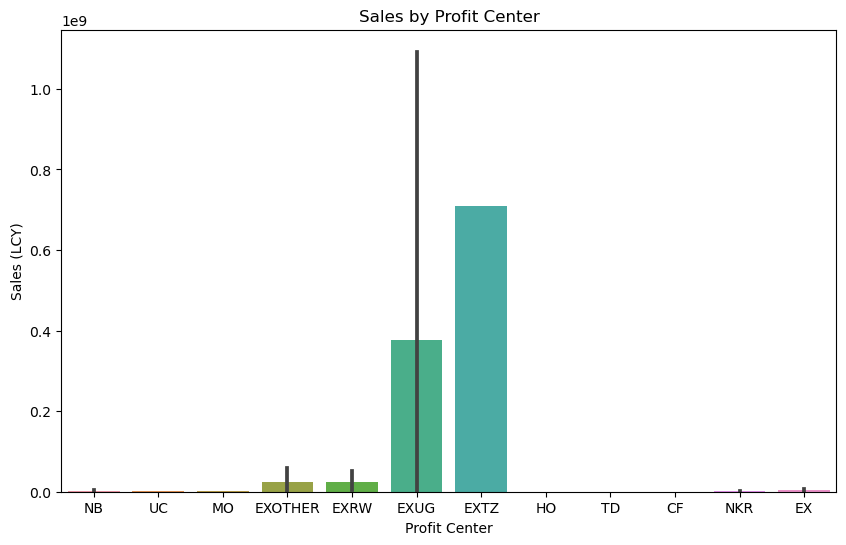

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Profit Center',y='Sales (LCY)',data=customer_clean)
ax.set_title('Sales by Profit Center')
plt.show()

3. Hypothesis testing 

In [46]:
# Is there a significant difference between profit center and sales ? 

In [47]:
from scipy.stats import f_oneway

In [48]:
groups = [group_data['Sales (LCY)'] for name, group_data in customer_clean.groupby('Profit Center')]
f_statistic, p_value = f_oneway(*groups)

In [49]:
print(f"ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpreting the results 
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in sales between Profit Centers.")
else:
    print("Fail to reject null hypothesis: No significant difference in sales between Profit Centers.")



ANOVA Results:
F-statistic: 149.64056219602466
P-value: 1.6247291288905735e-301
Reject null hypothesis: There is a significant difference in sales between Profit Centers.


In [50]:
# is there a significant difference in payments made between the different profit centres ?

In [51]:
groups2 = [group_data['Payments (LCY)'] for name, group_data in customer_clean.groupby('Profit Center')]
f_statistic, p_value = f_oneway(*groups2)

In [52]:
print(f"ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpreting the results 
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in payments made between Profit Centers.")
else:
    print("Fail to reject null hypothesis: No significant difference in payments made etween Profit Centers.")

ANOVA Results:
F-statistic: 127.19286658524652
P-value: 5.2102880110727846e-260
Reject null hypothesis: There is a significant difference in payments made between Profit Centers.


In [53]:
# is there a siginificant difference in  sales between different locations ? 

In [54]:
groups3 = [group_data['Sales (LCY)'] for name, group_data in customer_clean.groupby('Location Code')]
f_statistic, p_value = f_oneway(*groups3)

In [55]:
print(f"ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpreting the results 
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in sales between different locations.")
else:
    print("Fail to reject null hypothesis: No significant difference in sales between different locations.")

ANOVA Results:
F-statistic: 179.1423560144659
P-value: 7.793106117428809e-177
Reject null hypothesis: There is a significant difference in sales between different locations.


In [56]:
# is there a significant different in payments made in the different locations ?

In [57]:
groups4 = [group_data['Payments (LCY)'] for name, group_data in customer_clean.groupby('Location Code')]
f_statistic, p_value = f_oneway(*groups4)

In [58]:
print(f"ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpreting the results 
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in payments made between different locations.")
else:
    print("Fail to reject null hypothesis: No significant difference in payments made between different locations.")

ANOVA Results:
F-statistic: 154.57527658047826
P-value: 7.778659656098821e-154
Reject null hypothesis: There is a significant difference in payments made between different locations.


4. Classifying customers using clustering  

In [59]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder

In [60]:
# Encoding the categorical variables 

In [61]:
label_encoder = LabelEncoder()
non_zerosales['location_code_encoded'] = label_encoder.fit_transform(non_zerosales['Location Code'])
non_zerosales['profit_center_encoded'] = label_encoder.fit_transform(non_zerosales['Profit Center'])


In [62]:
non_zerosales['outstanding_balance']= non_zerosales['Balance (LCY)']- non_zerosales['Balance Due (LCY)']
data=non_zerosales[['location_code_encoded','profit_center_encoded','Balance (LCY)','Balance Due (LCY)','Sales (LCY)','outstanding_balance','Payments (LCY)','payment_sale_ratio']]

In [63]:
# Scalling all the selected variables 

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )

In [66]:
scaled_data.head()

,location_code_encoded,profit_center_encoded,Balance (LCY),Balance Due (LCY),Sales (LCY),outstanding_balance,Payments (LCY),payment_sale_ratio
0,0.795949,0.010295,4.181791,0.799267,8.793590,5.308512,9.434866,-0.035017
1,0.795949,0.010295,-0.061851,-0.064970,-0.062731,-0.041501,-0.042068,0.328428
2,0.795949,0.010295,-0.061851,-0.064970,0.620524,-0.041501,0.851260,0.081686
3,0.795949,0.010295,-0.061851,-0.064970,-0.076411,-0.041501,-0.077806,0.018288
4,0.795949,0.010295,-0.061851,-0.064970,11.033612,-0.041501,11.772076,-0.037688


In [67]:
# Performing a dimensionality reduction to atleast three features to improve the accuracy of the clusters 

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_data = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,3841.0,7.399560e-18,2.047689,-2.973910,-0.157151,-0.137856,-0.106985,71.496409
col2,3841.0,2.959824e-17,1.088464,-3.013917,-0.573011,-0.568624,1.451079,5.776871
col3,3841.0,-7.399560e-18,1.000814,-3.940569,-0.068150,-0.043842,-0.001309,59.661262


In [70]:
# Determining the total number of clusters in the data 

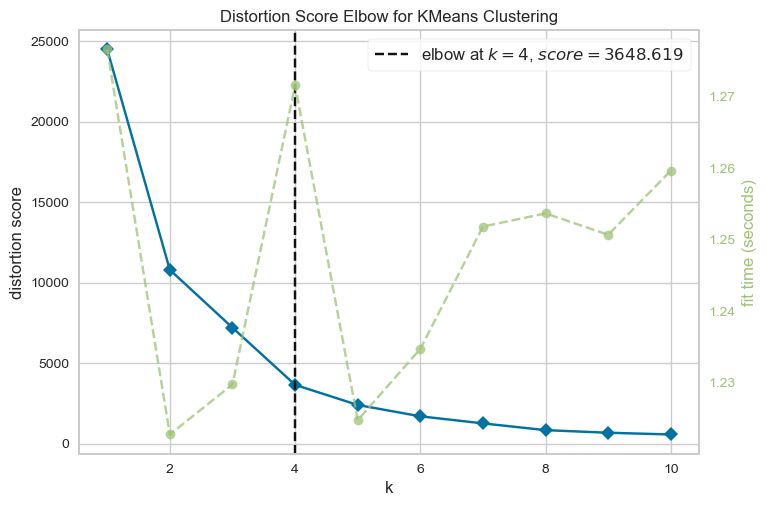

In [71]:
elbow = KElbowVisualizer(KMeans(), k=np.arange(1,11))
elbow.fit(PCA_data)
elbow.show();

In [72]:
# The results show that there are four clusters denoting three customer segments in the data 

In [73]:
# Creating a K-means agglomerative clustering model with K=4 

In [74]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

In [75]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_data)
PCA_data["Clusters"] = yhat_AC

In [76]:
# Adding the cluster variable into the data , where each cluster will represent the customer_type 

In [77]:
data["clusters"]= yhat_AC

In [78]:
# Plotting the clusters

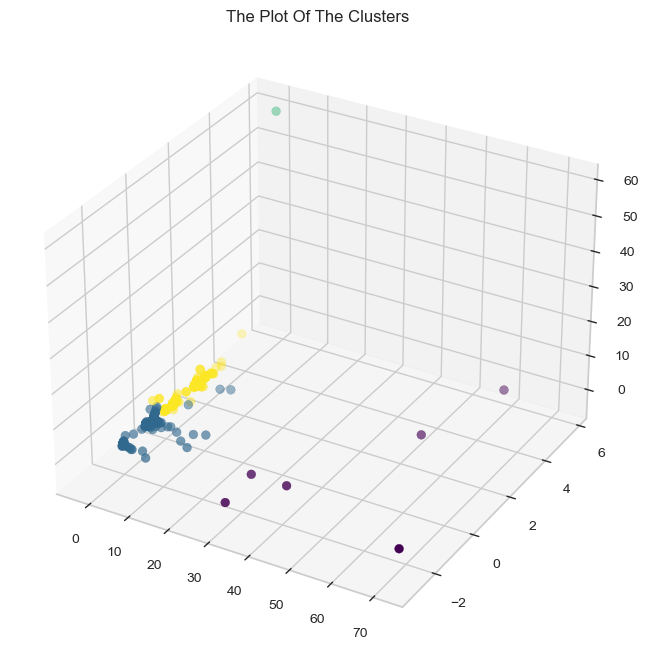

In [79]:
x =PCA_data["col1"]
y =PCA_data["col2"]
z =PCA_data["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_data["Clusters"], marker='o', cmap = cm.viridis)
ax.set_title("The Plot Of The Clusters")
plt.show()

In [80]:
# The distribution of the clusters 

<Axes: xlabel='clusters', ylabel='count'>

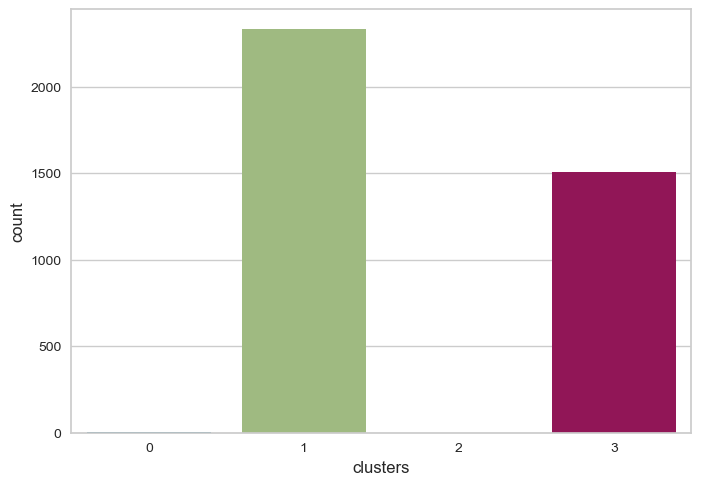

In [81]:
sns.countplot(x='clusters',data=data)

In [82]:
data['clusters'].value_counts()

1    2330
3    1504
0       6
2       1
Name: clusters, dtype: int64

- it seems that out of the four clusters only 2 are significant in terms of the frequency counts 

In [83]:
# Distribution of the clusters as per outstanding balance and payment to sale ratio

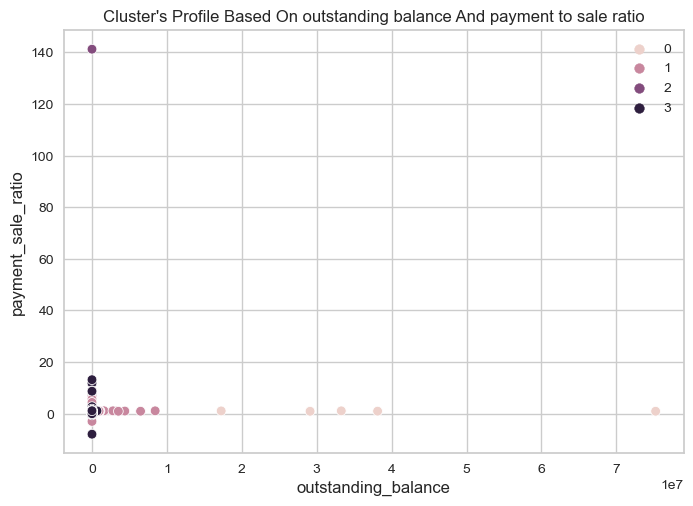

In [84]:
pl = sns.scatterplot(data = data,x=data["outstanding_balance"], y=data["payment_sale_ratio"],hue=data["clusters"])
pl.set_title("Cluster's Profile Based On outstanding balance And payment to sale ratio")
plt.legend()
plt.show()

- it seems that the clsuters with the highest frequency either have a low outstanding balance and a high payment to sale ratio or a high outstanding balance and a low payment to sale ratio

5. classifying the customers using ML 

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [86]:
X = data.drop(['clusters'],axis=1)
y = data['clusters']

In [87]:
# splitting the data into train and test set 

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [89]:
# using a random forest , gradient boosting and logistic regression models 

In [90]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [91]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

In [92]:
# Print accuracy results 

In [93]:
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

Random Forest: Accuracy = 1.0000
Gradient Boosting: Accuracy = 1.0000
Logistic Regression: Accuracy = 0.5189


In [94]:
# The best model 

In [95]:
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy = {results[best_model]:.4f}")


Best Model: Random Forest with Accuracy = 1.0000


In [96]:
# Feature importnace with the random forest classifier 

In [97]:
features = ['Balance (LCY)', 'Balance Due (LCY)', 'Sales (LCY)', 'Payments (LCY)', 'outstanding_balance', 'payment_sale_ratio', 'location_code_encoded','profit_center_encoded']

In [98]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [99]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
y_pred = rf_classifier.predict(X_test)

In [101]:
# Creating the confusion matrix 

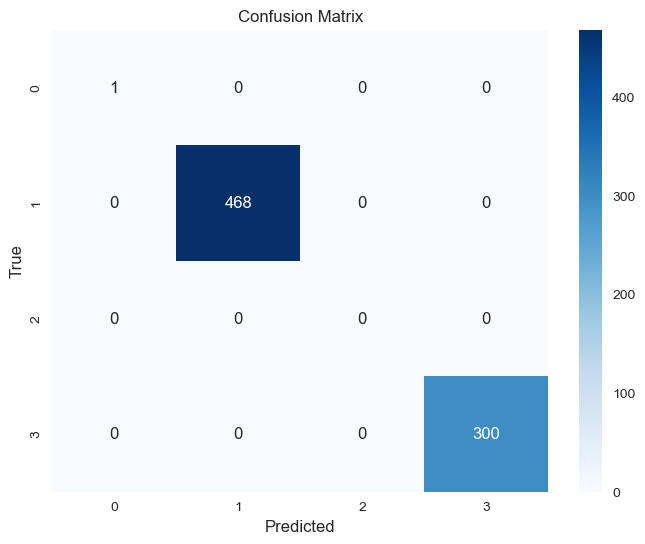

In [102]:
cm = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [103]:
# The most importnat features 

In [104]:
importances = rf_classifier.feature_importances_

In [105]:
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. Balance Due (LCY) (0.5703741441173039)
2. Balance (LCY) (0.3087723579854863)
3. profit_center_encoded (0.03388373001854684)
4. location_code_encoded (0.025195331047031883)
5. outstanding_balance (0.023062745193288894)
6. Sales (LCY) (0.018308436493132886)
7. Payments (LCY) (0.018116089031677617)
8. payment_sale_ratio (0.0022871661135317124)


In [106]:
# Based on the output the most significant variable in regard to determining the type of customer is Balance Due (LCY)

# 2. analyzing the Items dataset 

In [107]:
items_data.head()

,No.,Tariff No.,Description,Type,Inventory,Substitutes Exist,Assembly BOM,Cost is Posted to G/L,Item Category Code,Production BOM No.,Pattern,Routing No.,Tariff No.1,Base Unit of Measure,Cost is Adjusted,Unit Cost,Unit Price,Vendor No.,Default Deferral Template
0,C05160580000,NaN,Vanilla 4l,Inventory,0.00,False,False,True,NaN,NaN,NaN,NaN,NaN,PCS,True,0.00,0.00,NaN,NaN
1,CHOC CHIPS,NaN,NaN,Inventory,0.00,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,True,0.00,0.00,NaN,NaN
2,CNS036,NaN,PHINOPHTHALIEN,Inventory,3.00,False,False,True,DAIRYLAND,NaN,NaN,NaN,NaN,LITRES,True,255.00,0.00,NaN,NaN
3,CONS0001,NaN,Sterbac with test strips,Inventory,163.38,False,False,True,NaN,NaN,NaN,NaN,NaN,PCS,True,768.41,768.41,NaN,NaN
4,CONS0002,NaN,Silex 150 laundry soap,Inventory,0.00,False,False,True,NaN,NaN,NaN,NaN,NaN,KGS,True,876.50,876.50,NaN,NaN


In [108]:
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No.                        1419 non-null   object 
 1   Tariff No.                 345 non-null    object 
 2   Description                1412 non-null   object 
 3   Type                       1419 non-null   object 
 4   Inventory                  1419 non-null   float64
 5   Substitutes Exist          1419 non-null   bool   
 6   Assembly BOM               1419 non-null   bool   
 7   Cost is Posted to G/L      1419 non-null   bool   
 8   Item Category Code         628 non-null    object 
 9   Production BOM No.         167 non-null    object 
 10  Pattern                    0 non-null      float64
 11  Routing No.                173 non-null    object 
 12  Tariff No.1                345 non-null    object 
 13  Base Unit of Measure       1414 non-null   objec

In [109]:
print(items_data.shape)

(1419, 19)


In [110]:
items_data.isna().sum()

No.                             0
Tariff No.                   1074
Description                     7
Type                            0
Inventory                       0
Substitutes Exist               0
Assembly BOM                    0
Cost is Posted to G/L           0
Item Category Code            791
Production BOM No.           1252
Pattern                      1419
Routing No.                  1246
Tariff No.1                  1074
Base Unit of Measure            5
Cost is Adjusted                0
Unit Cost                       0
Unit Price                      0
Vendor No.                   1418
Default Deferral Template    1419
dtype: int64

1. Cleaning the data 

In [111]:
# REmoving variables with more than 70% missing values 

In [112]:
missing_values= (items_data.isnull().sum()/ len(items_data))*100

In [113]:
missing_values

No.                            0.000000
Tariff No.                    75.687104
Description                    0.493305
Type                           0.000000
Inventory                      0.000000
Substitutes Exist              0.000000
Assembly BOM                   0.000000
Cost is Posted to G/L          0.000000
Item Category Code            55.743481
Production BOM No.            88.231149
Pattern                      100.000000
Routing No.                   87.808316
Tariff No.1                   75.687104
Base Unit of Measure           0.352361
Cost is Adjusted               0.000000
Unit Cost                      0.000000
Unit Price                     0.000000
Vendor No.                    99.929528
Default Deferral Template    100.000000
dtype: float64

In [114]:
mask=missing_values > 70.0

In [115]:
data_clean=items_data.loc[:,~mask]

In [116]:
data_clean.isna().sum()

No.                        0
Description                7
Type                       0
Inventory                  0
Substitutes Exist          0
Assembly BOM               0
Cost is Posted to G/L      0
Item Category Code       791
Base Unit of Measure       5
Cost is Adjusted           0
Unit Cost                  0
Unit Price                 0
dtype: int64

In [117]:
print(data_clean.shape)

(1419, 12)


In [118]:
# Number of unique values for each categorical variable

In [119]:
cat_columns = data_clean.select_dtypes(include=['object']).columns
nunique = data_clean[cat_columns].nunique()
print(nunique)

No.                     1419
Description             1408
Type                       1
Item Category Code        28
Base Unit of Measure      12
dtype: int64


In [120]:
print(data_clean.columns)

Index(['No.', 'Description', 'Type', 'Inventory', 'Substitutes Exist',
       'Assembly BOM', 'Cost is Posted to G/L', 'Item Category Code',
       'Base Unit of Measure', 'Cost is Adjusted', 'Unit Cost', 'Unit Price'],
      dtype='object')


In [121]:
# Number of unique values for each boolean variable

In [122]:
bool_columns = data_clean.select_dtypes(include=['bool']).columns
nunique = data_clean[bool_columns].nunique()
print(nunique)

Substitutes Exist        1
Assembly BOM             1
Cost is Posted to G/L    1
Cost is Adjusted         1
dtype: int64


In [123]:
# All the boolean and categorical variables have a single class isntance and so I decided to drop them because they hold no significance

In [124]:
data_clean=data_clean.copy()

In [125]:
item_data=data_clean.drop(['Substitutes Exist','Assembly BOM','Cost is Posted to G/L','Cost is Adjusted','Type','Base Unit of Measure','No.'],axis=1)

2. Exploratory data analysis 

In [126]:
# item category based on unit cost 

In [127]:
items_sorted=data_clean.sort_values('Unit Cost',ascending=False)

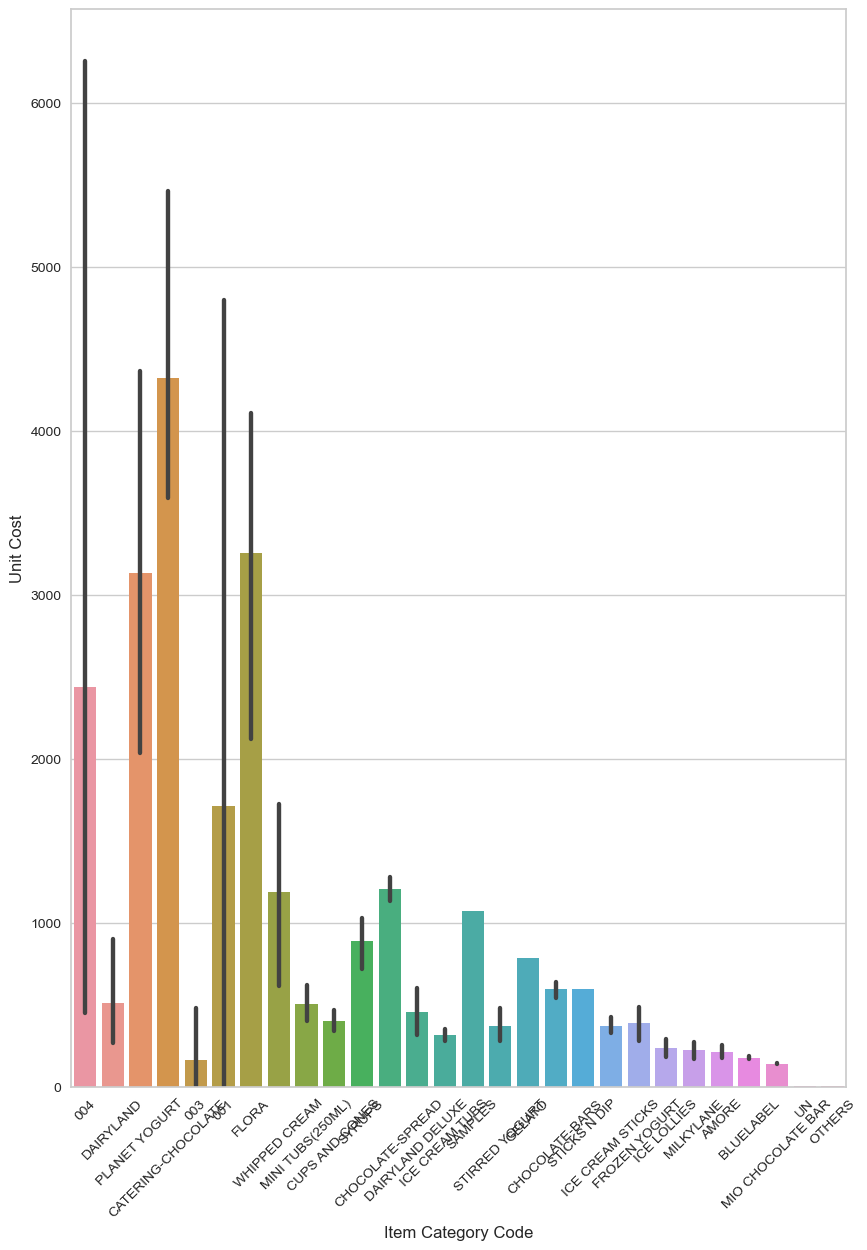

In [128]:
fig,ax=plt.subplots(figsize=(10,14))
sns.barplot(x='Item Category Code',y='Unit Cost',data=items_sorted)
plt.xticks(rotation=45)
plt.show()

In [129]:
# item category based on unit price 

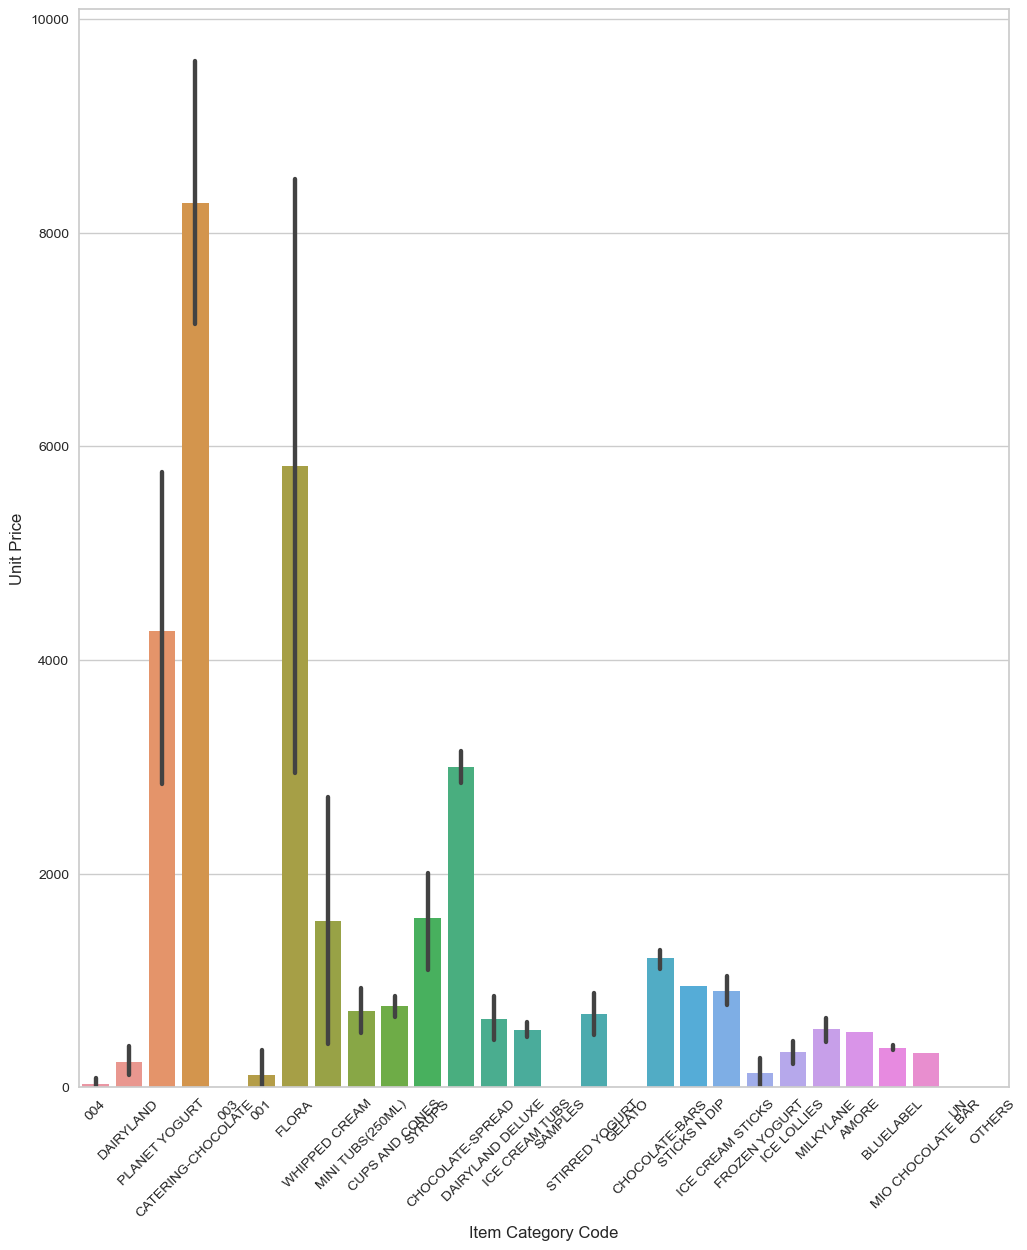

In [130]:
fig,ax=plt.subplots(figsize=(12,14))
sns.barplot(x='Item Category Code',y='Unit Price',data=items_sorted)
plt.xticks(rotation=45)
plt.show()

In [131]:
# Relationship between unit cost and unit price 

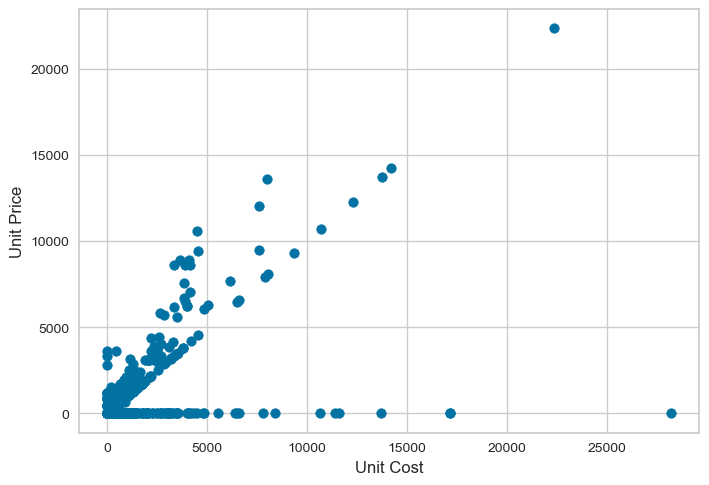

In [132]:
plt.scatter(data_clean['Unit Cost'],data_clean['Unit Price'])
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.show()

In [133]:
# THere seems to be a linear relationship between the two variables where an increase in unit cost leads to an increase in unit price 

3. summary statistics for both unit cost and unit price 

In [134]:
units=data_clean[['Unit Cost','Unit Price']]

In [135]:
units.describe()

,Unit Cost,Unit Price
count,1419.000000,1419.000000
mean,641.089683,573.784926
std,1789.509229,1554.842086
min,0.000000,0.000000
25%,5.940000,0.000000
50%,113.000000,1.010000
75%,523.150000,603.450000
max,28219.840000,22345.010000


<Axes: >

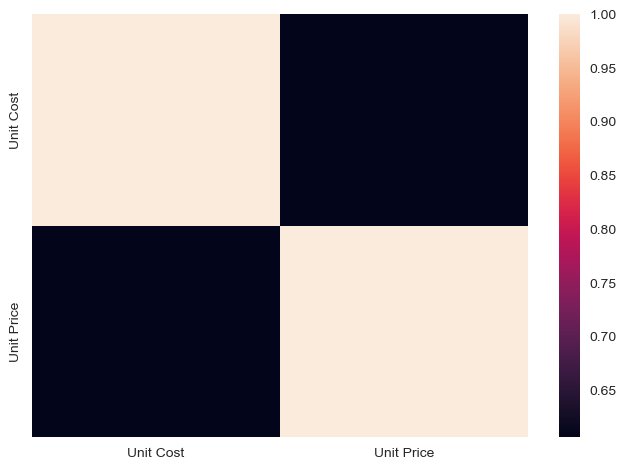

In [136]:
sns.heatmap(units.corr())

In [137]:
# The results show that there is a positive correlation of greater than 0.5 between the two variables 

In [138]:
data=item_data.dropna()

In [139]:
data.isna().sum()

Description           0
Inventory             0
Item Category Code    0
Unit Cost             0
Unit Price            0
dtype: int64

In [140]:
print(data.shape)

(628, 5)


In [141]:
# Creating a regression model between the two variables 

In [142]:
import statsmodels.api as sm

In [143]:
X=data['Unit Cost']
y=data['Unit Price']

In [144]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Unit Price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.59e-29
Time:                        10:52:00   Log-Likelihood:                -5385.2
No. Observations:                 628   AIC:                         1.077e+04
Df Residuals:                     626   BIC:                         1.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        521.5535     54.777      9.521      0.0

In [145]:
# The results show that unit cost significantly affects a change in Unit price by a positive value of 0.38

In [146]:
# creating a cluster of each products 

In [147]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder

In [148]:
# Pre-processing the string variables

In [149]:
# Encode the categorical columns
le = LabelEncoder()
data.loc[:, 'Description'] = le.fit_transform(data['Description'])
data.loc[:, 'Item Category Code'] = le.fit_transform(data['Item Category Code'])

In [150]:
# Clustering the data

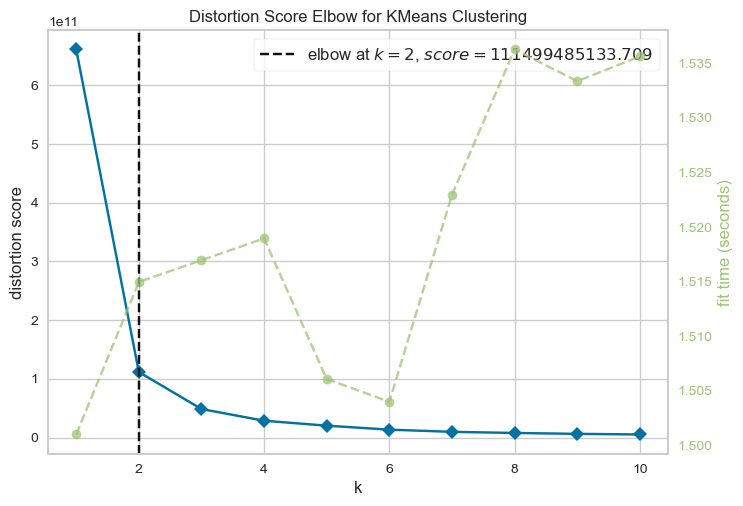

In [151]:
elbow = KElbowVisualizer(KMeans(), k=np.arange(1,11))
elbow.fit(data)
elbow.show();

In [152]:
# The results show that there are two clusters in the data 

In [153]:
# Create a k-means clustering model with k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

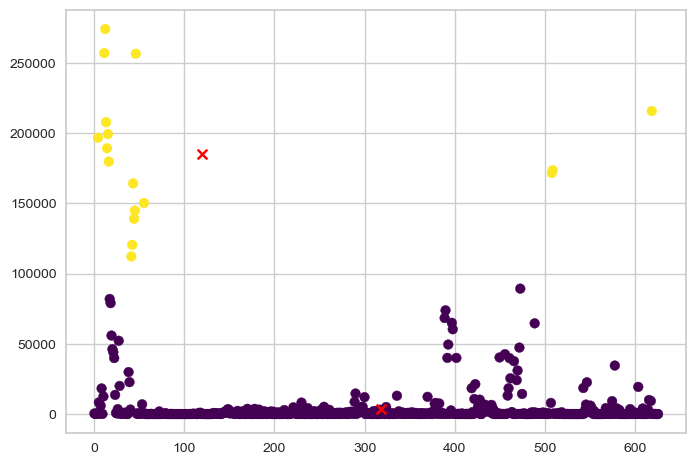

In [154]:
fig, ax = plt.subplots()
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.show()

In [155]:
data_clustered = data.copy()
data_clustered['Cluster'] = y_kmeans

In [156]:
# Creating a count plot of the clusters

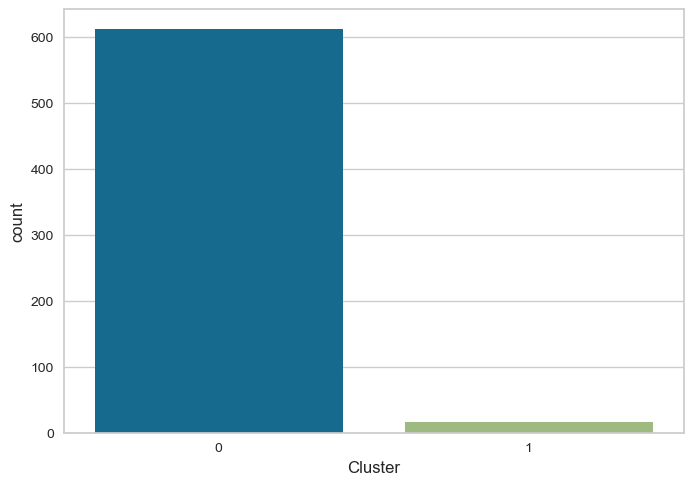

In [157]:
sns.countplot(x='Cluster', data=data_clustered)
plt.show()

In [158]:
# It seems that the clusters are not equally distributed meaning one cluster has more values than the others 

In [159]:
# Let us see the distribution of the clusters based on unit Price and Unit Cost 

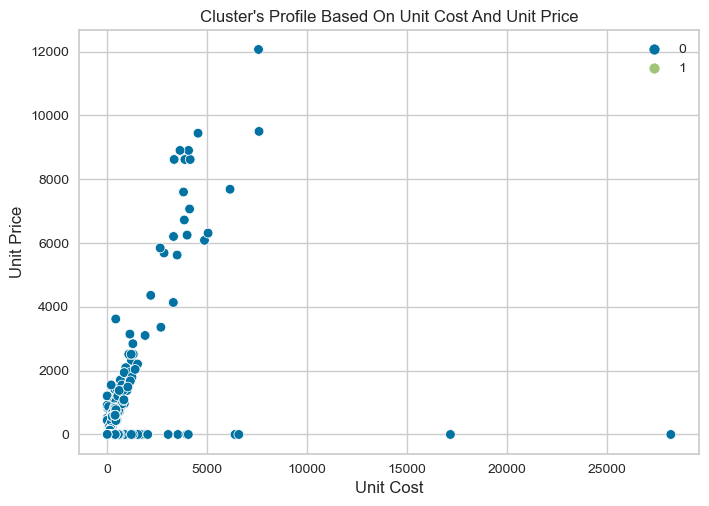

In [160]:
sns.scatterplot(data=data_clustered, x='Unit Cost', y='Unit Price', hue='Cluster')
plt.title("Cluster's Profile Based On Unit Cost And Unit Price")
plt.legend()
plt.show()

In [161]:
# It seems most of the items have a relatively low unit cost and unit price 